In [18]:
import pandas as pd
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
verbose  = True
graphics = True
gl.OptCst.define(gl.ECst.NTCOL,6)
gdoc.setNoScroll()

data = 'data/pdh_data.parquet'

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_parquet(data)
df

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,pfas_values,unit,pfas_sum,details,matrix,date,year
0,Known PFAS user,52.504114,-0.682637,3F,Corby,United Kingdom,Industrial site,None,Company website,3F,https://www.3fff.co.uk/,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
1,Known PFAS user,50.871865,6.034522,3M,Kerkrade,Netherlands,Industrial site,Manufacture of rubber and plastic products,Company website,3M,https://www.3mdeutschland.de/3M/de_DE/presse-d...,0,Known_PFAS_User_List,[],ng/l,NaN,"{""maps_link"": ""https://goo.gl/maps/z5dYoRaZxkK...",None,None,NaN
2,Known PFAS user,50.223409,8.765597,3P - Performance Plastics Products,Karben,Germany,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
3,Known PFAS user,47.858601,5.347156,3P Performance Plastics Products,Langres,France,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.haute-marne.gouv.fr/content/downlo...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
4,Known PFAS user,39.471674,-0.538828,3P Productos Plásticos Performantes,Valencia,Spain,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478235,Known,NaN,NaN,Tap water sampling,Montpellier,France,Sampling location,None,Own sampling campaign,Enquête Radio France 19/09/2024,https://www.francetvinfo.fr/enquetes-franceinf...,131,Radio France - Drinking water,"[{""cas_id"": ""13252-13-6"", ""unit"": ""ng/l"", ""sub...",ng/l,0.0,"{""Denomination"": ""FB HERAULT"", ""Date_heure_Pre...",Drinking water,2024-04-25,2024.0
478236,Known,NaN,NaN,Tap water sampling,Fenay,France,Sampling location,None,Own sampling campaign,Enquête Radio France 19/09/2024,https://www.francetvinfo.fr/enquetes-franceinf...,131,Radio France - Drinking water,"[{""cas_id"": ""13252-13-6"", ""unit"": ""ng/l"", ""sub...",ng/l,0.0,"{""Denomination"": ""FB BOURGOGNE"", ""Date_heure_P...",Drinking water,2024-04-29,2024.0
478237,Known,NaN,NaN,Tap water sampling,Saint-Jean-de-Losne,France,Sampling location,None,Own sampling campaign,Enquête Radio France 19/09/2024,https://www.francetvinfo.fr/enquetes-franceinf...,131,Radio France - Drinking water,"[{""cas_id"": ""355-46-4"", ""unit"": ""ng/l"", ""subst...",ng/l,25.5,"{""Denomination"": ""FB BOURGOGNE"", ""Date_heure_P...",Drinking water,2024-05-07,2024.0
478238,Known,NaN,NaN,Tap water sampling,Cazaux La Teste de Buche,France,Sampling location,None,Own sampling campaign,Enquête Radio France 19/09/2024,https://www.francetvinfo.fr/enquetes-franceinf...,131,Radio France - Drinking water,"[{""cas_id"": ""13252-13-6"", ""unit"": ""ng/l"", ""sub...",ng/l,0.0,"{""Denomination"": ""FB GIRONDE"", ""Date_heure_Pre...",Drinking water,2024-05-01,2024.0


In [3]:

df.category.unique()

array(['Known PFAS user', 'Presumptive', 'Known'], dtype=object)

In [4]:
df_num = df[df.category=='Known']
df_num = df_num.drop(['name','city','type','sector','source_type','source_text','source_url','dataset_name','details'],axis=1)
df_num_surf = df_num[df_num.matrix=='Surface water']
df_num_surf

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year
12991,Known,50.808932,3.352552,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,130.00,Surface water,None,2018.0
12992,Known,51.016507,4.088303,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,200.00,Surface water,None,2017.0
12993,Known,51.042282,3.548967,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,42400.00,Surface water,None,2016.0
12994,Known,51.771554,6.605953,Germany,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,50.00,Surface water,None,2017.0
12995,Known,49.590101,7.603395,Germany,10,"[{""cas_id"": ""307-24-4"", ""unit"": ""ng/l"", ""subst...",ng/l,580.00,Surface water,None,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
476305,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,35.18,Surface water,2023-04-28,2023.0
476306,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""335-24-0"", ""unit"": ""ng/l"", ""subst...",ng/l,120.50,Surface water,2023-08-09,2023.0
476307,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""2706-90-3"", ""unit"": ""ng/l"", ""subs...",ng/l,40.81,Surface water,2023-12-01,2023.0
476308,Known,51.658000,-1.422160,United Kingdom,129,"[{""cas_id"": ""375-22-4"", ""unit"": ""ng/l"", ""subst...",ng/l,3.45,Surface water,2023-04-24,2023.0


In [5]:
df_num_surf_france = df_num_surf[df_num_surf.country == 'France']

lat_min, lat_max = 41.0, 51.2
lon_min, lon_max = -5.1, 9.6 # On ne veut que la France métropolitaine

df_num_surf_france = df_num_surf_france[(df_num_surf_france['lat'] >= lat_min) & (df_num_surf_france['lat'] <= lat_max) & 
               (df_num_surf_france['lon'] >= lon_min) & (df_num_surf_france['lon'] <= lon_max)]


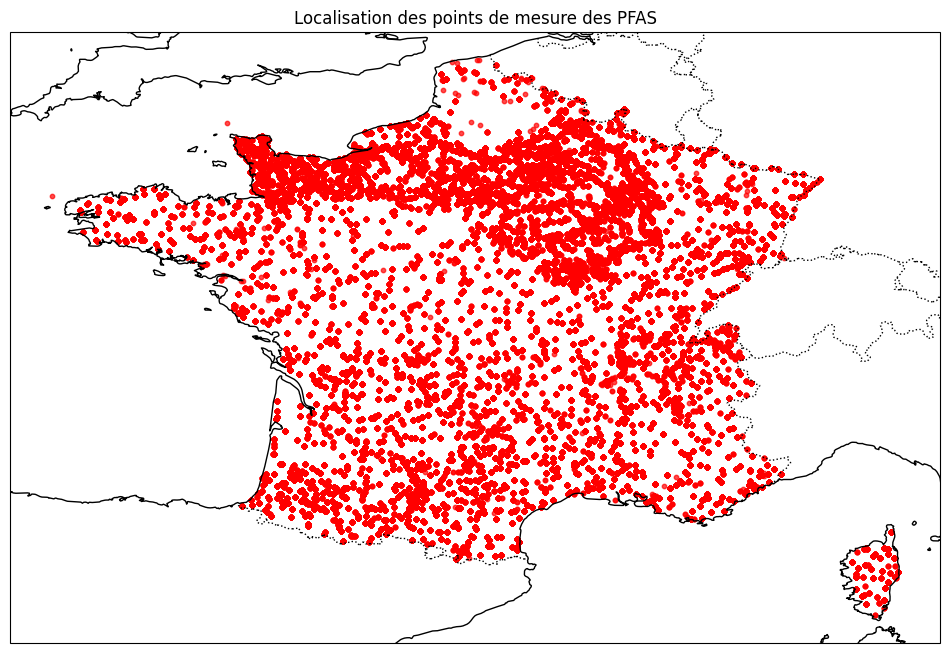

In [6]:
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Tracer les points de latitude et longitude
ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'], color='red', s=10, alpha=0.7, transform=ccrs.PlateCarree())

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')
plt.show()

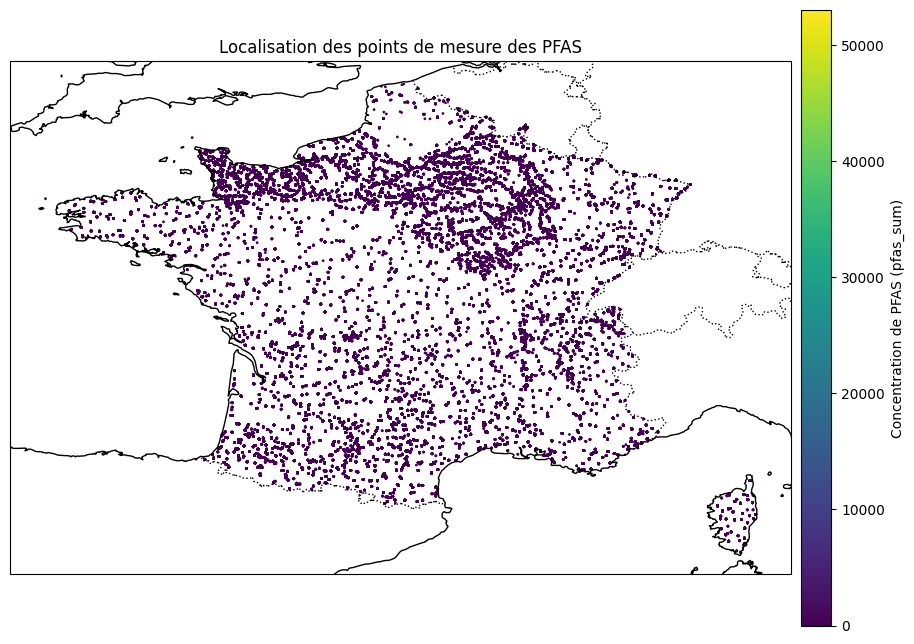

In [7]:
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de sum_pfas pour colorer les points
values = df_num_surf_france['pfas_sum']

# Tracer les points de latitude et longitude avec une coloration selon sum_pfas
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=1, alpha=1, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')
plt.show()

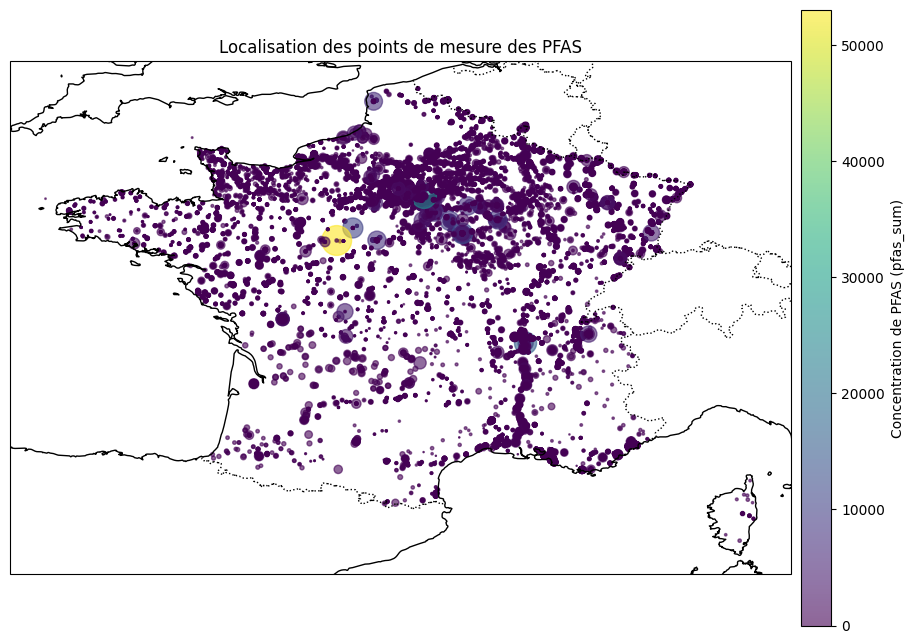

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient (ici 20) pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')

# Afficher la figure
plt.show()


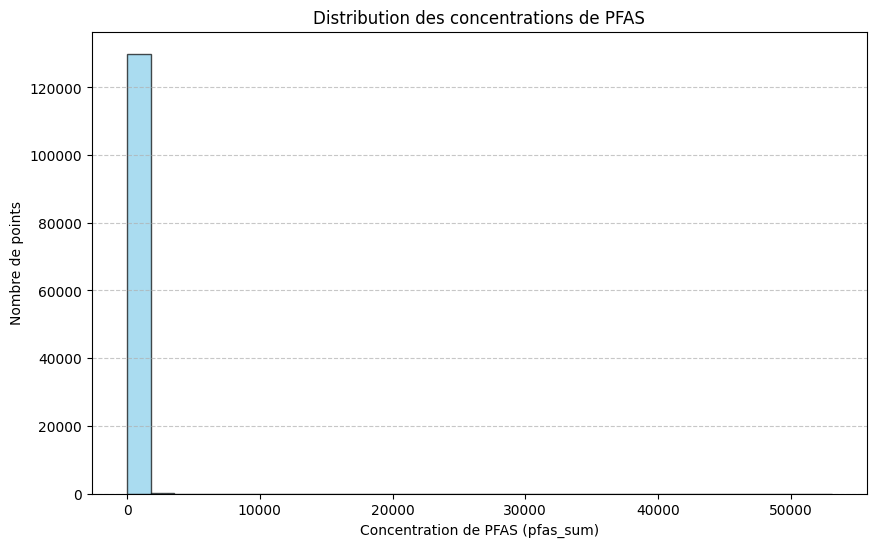

In [14]:

# Définir les valeurs de pfas_sum à partir du DataFrame
values = df_num_surf_france['pfas_sum']

# Créer l'histogramme avec 10 classes (bins)
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Concentration de PFAS (pfas_sum)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()

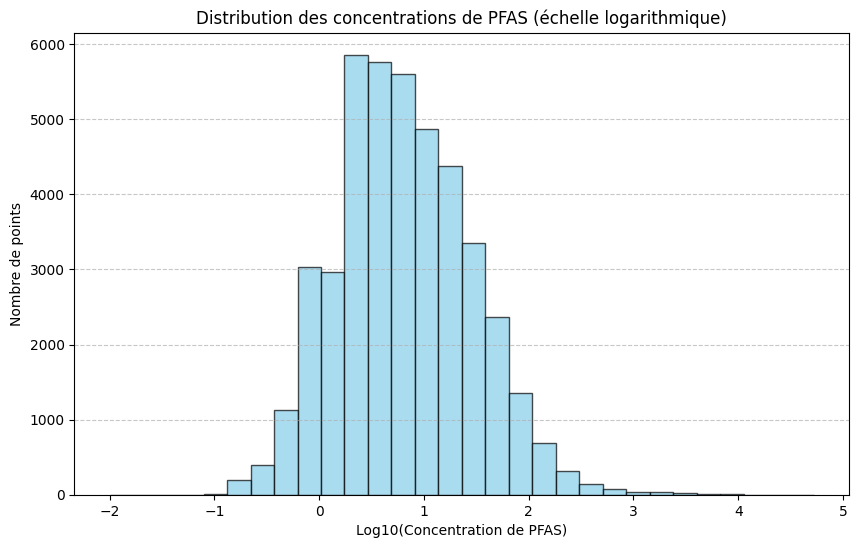

In [9]:
import numpy as np

df_num_surf_france['pfas_sum_log'] = df_num_surf_france['pfas_sum'].apply(lambda x: np.log10(x) if x > 0 else None)

# Appliquer une transformation logarithmique sur les valeurs
log_values = df_num_surf_france['pfas_sum_log']

# Créer l'histogramme avec une échelle logarithmique
plt.figure(figsize=(10, 6))
plt.hist(log_values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Log10(Concentration de PFAS)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS (échelle logarithmique)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()


In [10]:
df_num_surf_france.head()

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year,pfas_sum_log
13537,Known,42.444155,2.161042,France,12,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,171.052276,Surface water,None,2010.0,2.233129
13563,Known,43.199694,5.870111,France,12,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,0.090000,Surface water,None,2009.0,-1.045757
13564,Known,43.199694,5.870111,France,12,"[{""cas_id"": ""355-46-4"", ""unit"": ""ng/l"", ""subst...",ng/l,0.010000,Surface water,None,2009.0,-2.000000
13572,Known,43.291111,2.989250,France,12,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,0.160000,Surface water,None,2009.0,-0.795880
13573,Known,43.291111,2.989250,France,12,"[{""cas_id"": ""1763-23-1"", ""unit"": ""ng/l"", ""subs...",ng/l,0.020000,Surface water,None,2009.0,-1.698970


In [11]:
data_france_2024 = df_num_surf_france[df_num_surf_france['year'] == 2024]

In [12]:
data_france_2024.shape

(2470, 12)

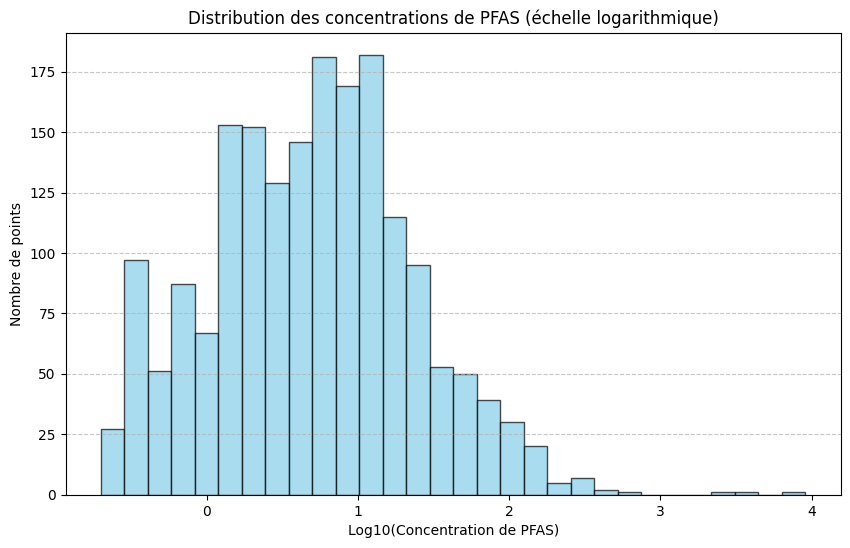

In [13]:
import numpy as np


# Appliquer une transformation logarithmique sur les valeurs
log_values = data_france_2024['pfas_sum_log']

# Créer l'histogramme avec une échelle logarithmique
plt.figure(figsize=(10, 6))
plt.hist(log_values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Log10(Concentration de PFAS)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS (échelle logarithmique)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()


In [14]:
import gstlearn as gl

db_france_2024 = gl.Db_fromPanda(data_france_2024)
db_france_2024


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 0
Number of Columns            = 6
Total number of samples      = 2470

Variables
---------
Column = 0 - Name = lat - Locator = NA
Column = 1 - Name = lon - Locator = NA
Column = 2 - Name = dataset_id - Locator = NA
Column = 3 - Name = pfas_sum - Locator = NA
Column = 4 - Name = year - Locator = NA
Column = 5 - Name = pfas_sum_log - Locator = NA

In [15]:
db_france_2024.setLocators(["lon","lat"], gl.ELoc.X)
db_france_2024.setLocator("pfas_sum_log", gl.ELoc.Z)

In [19]:
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_resume=True, flag_vars=True, flag_extend=True) 
    db_france_2024.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Total number of samples      = 2470

Data Base Extension
-------------------
Coor #1 - Min =     -3.388 - Max =      5.487 - Ext = 8.87412
Coor #2 - Min =     44.979 - Max =     50.050 - Ext = 5.07104

Variables
---------
Column = 0 - Name = lat - Locator = x2
Column = 1 - Name = lon - Locator = x1
Column = 2 - Name = dataset_id - Locator = NA
Column = 3 - Name = pfas_sum - Locator = NA
Column = 4 - Name = year - Locator = NA
Column = 5 - Name = pfas_sum_log - Locator = z1


In [21]:
print("List of all variable names =",db_france_2024.getAllNames())

List of all variable names = ('lat', 'lon', 'dataset_id', 'pfas_sum', 'year', 'pfas_sum_log')


In [ ]:
tabZn = db_france_2024.getColumn('Zn') # equivalent to mydb["Zn"] or mydb[3]
selZn = tabZn < 20
db_france_2024.addSelection(selZn,'sel')
db_france_2024.setLocator('Pb',gl.ELoc.Z)
dbfmt = gl.DbStringFormat.createFromFlags(flag_stats=True)
if verbose:
    db_france_2024.display(dbfmt)

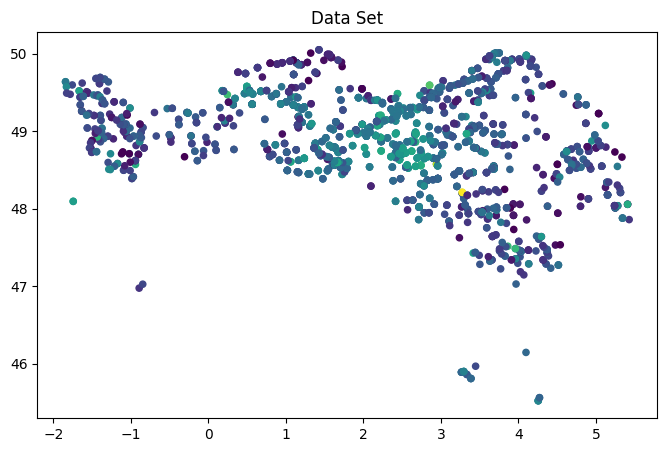

In [22]:
if graphics:
    ax = db_france_2024.plot(nameColor="pfas_sum_log")
    ax.decoration(title="Data Set")

In [23]:
myVarioParamOmni = gl.VarioParam()
mydir = gl.DirParam.create(npas=10, dpas=1.)
myVarioParamOmni.addDir(mydir)

In [24]:
dbcloud = gl.db_vcloud(db_france_2024, myVarioParamOmni)

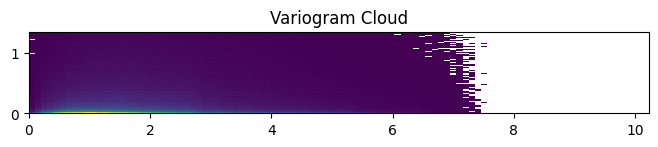

In [25]:
if graphics:
    ax = dbcloud.plot("Cloud*")
    ax.decoration(title="Variogram Cloud")

In [26]:
myVarioOmni = gl.Vario(myVarioParamOmni)
err = myVarioOmni.compute(db_france_2024, gl.ECalcVario.VARIOGRAM)
if verbose:
    myVarioOmni.display()


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 1
Space dimension             = 2
Variable(s)                 = [pfas_sum_log]

Variance-Covariance Matrix     0.449

Direction #1
------------
Number of lags              = 10
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000
Tolerance on direction      =     90.000 (degrees)
Calculation lag             =      1.000
Tolerance on distance       =     50.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0125602.000     0.310     0.312
         1539119.000     1.018     0.428
         2481361.000     1.973     0.495
         3286121.000     2.940     0.480
         4169745.000     3.956     0.489
         5 87923.000     4.935     0.376
         6 34618.000     5.928     0.388
         7  6241.000     6.754     0.443


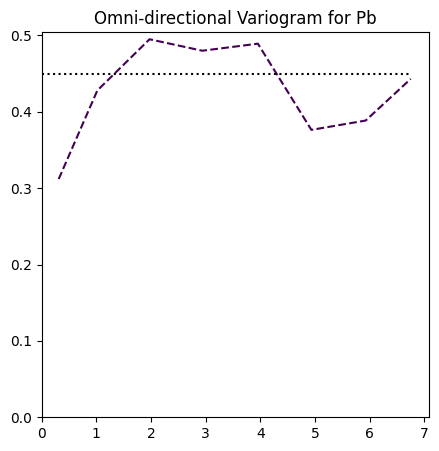

In [27]:
if graphics:
    ax = myVarioOmni.plot()
    ax.decoration(title="Omni-directional Variogram for Pb")

In [29]:
myvarioParam = gl.VarioParam()
mydirs = gl.DirParam.createMultiple(4, 10, 1.)
myvarioParam.addMultiDirs(mydirs)
myvario = gl.Vario(myvarioParam)
myvario.compute(db_france_2024,gl.ECalcVario.VARIOGRAM)
if verbose:
    myvario.display()


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 4
Space dimension             = 2
Variable(s)                 = [pfas_sum_log]

Variance-Covariance Matrix     0.449

Direction #1
------------
Number of lags              = 10
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000
Tolerance on direction      =     22.500 (degrees)
Calculation lag             =      1.000
Tolerance on distance       =     50.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0 36146.000     0.294     0.287
         1178380.000     1.055     0.400
         2247360.000     2.011     0.466
         3200867.000     2.954     0.495
         4137606.000     3.967     0.509
         5 81445.000     4.940     0.375
         6 32026.000     5.932     0.392
         7  5746.000     6.748     0.448

Direction #2
------------
Number of lags              = 10
Direction coefficients      =      0.

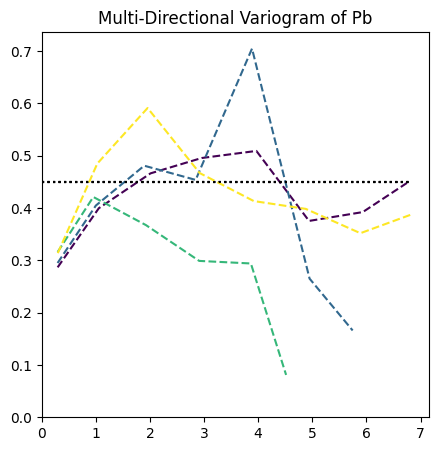

In [30]:
if graphics:
    ax = myvario.plot(idir=-1)
    ax.decoration(title="Multi-Directional Variogram of Pb")

In [31]:
myvmap = gl.db_vmap(db_france_2024,gl.ECalcVario.VARIOGRAM,[20,20])
if verbose:
    myvmap.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 5
Total number of samples      = 1681

Grid characteristics:
---------------------
Origin :     -8.874    -5.071
Mesh   :      0.444     0.254
Number :         41        41

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = VMAP.pfas_sum_log.Var - Locator = z1
Column = 4 - Name = VMAP.pfas_sum_log.Nb - Locator = NA


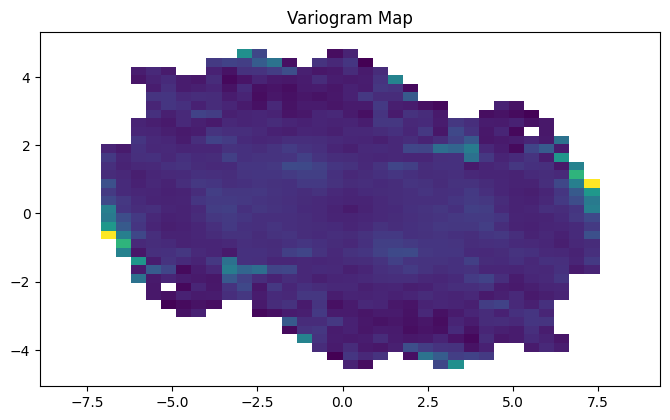

In [32]:
if graphics:
    ax = myvmap.plot(nameRaster="*Var")
    ax.decoration(title="Variogram Map")

In [33]:
mymodel = gl.Model.createFromDb(db_france_2024)
err = mymodel.fit(myvario,[gl.ECov.EXPONENTIAL,gl.ECov.SPHERICAL])

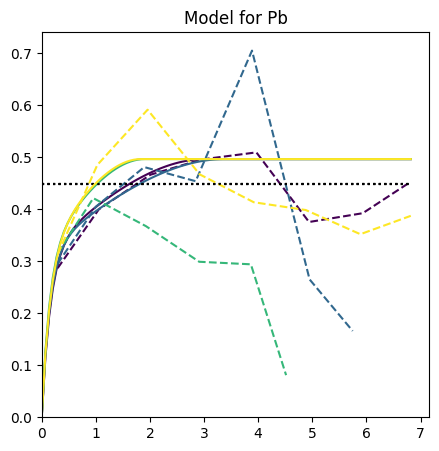

In [34]:
if graphics:
    ax = gp.varmod(myvario,mymodel)
    ax.decoration(title="Model for Pb")

In [36]:
myModelConstrained = gl.Model.createFromDb(db_france_2024)
constr = gl.Constraints()
paramid = gl.CovParamId(0,0,gl.EConsElem.RANGE,0,0)
constr.addItem(gl.ConsItem(paramid,gl.EConsType.EQUAL,1.))
err = myModelConstrained.fit(myVarioOmni,[gl.ECov.SPHERICAL],constr)
if (err > 0): print("Error while fitting the model")
myModelConstrained


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 1
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Spherical
- Sill         =      0.472
- Range        =      1.000
Total Sill     =      0.472
Known Mean(s)     0.000

In [37]:
mymodel.setDriftIRF()
if verbose:
    mymodel.display()


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 2
Number of drift function(s)  = 1
Number of drift equation(s)  = 1

Covariance Part
---------------
Exponential
- Sill         =      0.321
- Ranges       =      0.443     0.491
- Theo. Ranges =      0.148     0.164
- Angles       =     82.008     0.000
- Rotation Matrix
               [,  0]    [,  1]
     [  0,]    -0.139     0.990
     [  1,]    -0.990    -0.139
Spherical
- Sill         =      0.175
- Ranges       =      1.746     4.128
- Angles       =    115.768     0.000
- Rotation Matrix
               [,  0]    [,  1]
     [  0,]     0.435     0.901
     [  1,]    -0.901     0.435
Total Sill     =      0.496

Drift Part
----------
Universality_Condition


In [38]:
myneigh = gl.NeighMoving.create(flag_xvalid=False,nmaxi=6,radius=10)
if verbose:
    myneigh.display()


Moving Neighborhood
Minimum number of samples           = 1
Maximum number of samples           = 6
Maximum horizontal distance         = 10


In [40]:
mygrid = gl.DbGrid.createCoveringDb(db_france_2024,[],[0.5,0.5],[],[2,2])
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 2
Total number of samples      = 513

Grid characteristics:
---------------------
Origin :     -5.388    42.979
Mesh   :      0.500     0.500
Number :         27        19

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2


In [41]:
err = gl.test_neigh(db_france_2024,mygrid,mymodel,myneigh)
if (err > 0): print("Error while running test_neigh")
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 7
Total number of samples      = 513

Grid characteristics:
---------------------
Origin :     -5.388    42.979
Mesh   :      0.500     0.500
Number :         27        19

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
Column = 2 - Name = Neigh.pfas_sum_log.Number - Locator = NA
Column = 3 - Name = Neigh.pfas_sum_log.MaxDist - Locator = NA
Column = 4 - Name = Neigh.pfas_sum_log.MinDist - Locator = NA
Column = 5 - Name = Neigh.pfas_sum_log.NbNESect - Locator = NA
Column = 6 - Name = Neigh.pfas_sum_log.NbCESect - Locator = z1


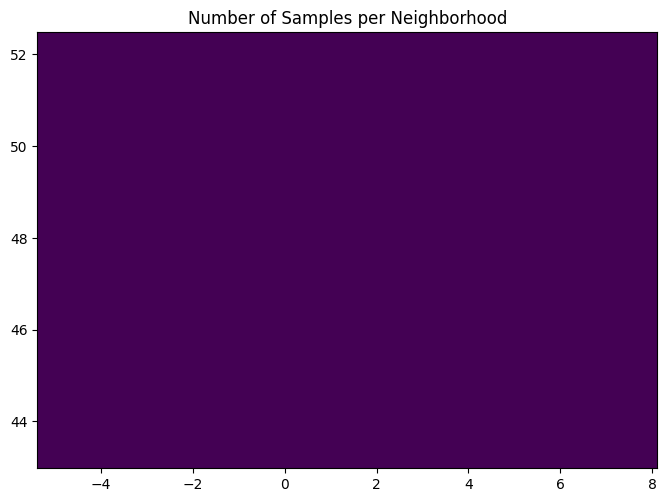

In [42]:
if graphics:
    ax = mygrid.plot(nameRaster="Neigh*Number")
    ax.decoration(title="Number of Samples per Neighborhood")

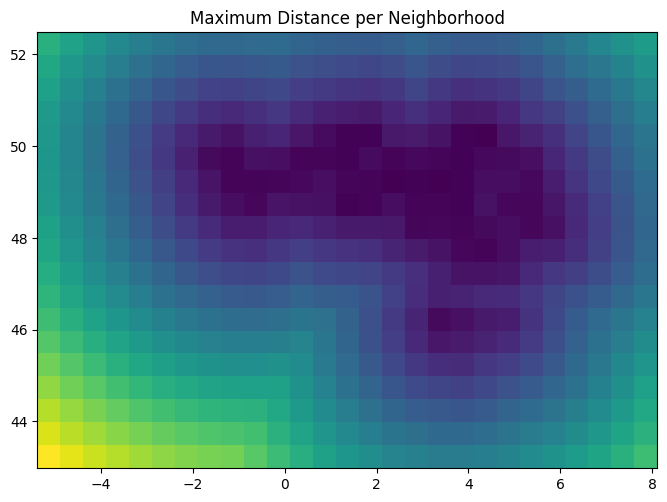

In [43]:
if graphics:
    ax=mygrid.plot(nameRaster="Neigh*MaxDist")
    ax.decoration(title="Maximum Distance per Neighborhood")

In [45]:
err = gl.xvalid(db_france_2024,mymodel,myneigh)
if (err > 0): print("Error while running xvalid")
if verbose:
    db_france_2024.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 8
Total number of samples      = 2470

Variables
---------
Column = 0 - Name = lat - Locator = x2
Column = 1 - Name = lon - Locator = x1
Column = 2 - Name = dataset_id - Locator = NA
Column = 3 - Name = pfas_sum - Locator = NA
Column = 4 - Name = year - Locator = NA
Column = 5 - Name = pfas_sum_log - Locator = NA
Column = 6 - Name = Xvalid.pfas_sum_log.esterr - Locator = z1
Column = 7 - Name = Xvalid.pfas_sum_log.stderr - Locator = NA


In [48]:
myneigh = gl.NeighUnique.create()
err = gl.kriging(db_france_2024,mygrid,mymodel,myneigh)
if (err > 0): print("Error while running kriging")
if verbose:
    mygrid.display(dbfmt)


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 9
Total number of samples      = 513

Grid characteristics:
---------------------
Origin :     -5.388    42.979
Mesh   :      0.500     0.500
Number :         27        19

Data Base Extension
-------------------
Coor #1 - Min =     -5.388 - Max =      7.612 - Ext = 13
Coor #2 - Min =     42.979 - Max =     51.979 - Ext = 9

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
Column = 2 - Name = Neigh.pfas_sum_log.Number - Locator = NA
Column = 3 - Name = Neigh.pfas_sum_log.MaxDist - Locator = NA
Column = 4 - Name = Neigh.pfas_sum_log.MinDist - Locator = NA
Column = 5 - Name = Neigh.pfas_sum_log.NbNESect - Locator = NA
Column = 6 - Name = Neigh.pfas_sum_log.NbCESect - Locator = NA
Column = 7 - Name = Kriging.Xvalid.pfas_sum_log.esterr.estim - Locator = z1
Column = 8 - Name = K

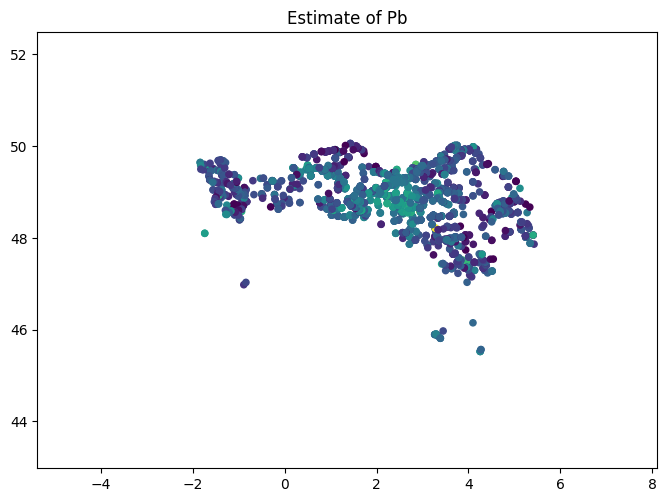

In [52]:
if graphics:
    ax = mygrid.plot(nameRaster="Kriging.Xvalid.pfas_sum_log.esterr.estim")
    ax = db_france_2024.plot(nameColor="pfas_sum_log")
    ax.decoration(title="Estimate of Pb")

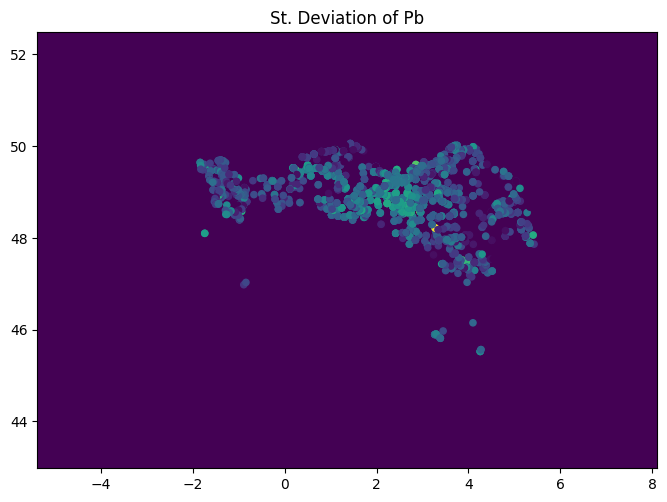

In [53]:
if graphics:
    ax = mygrid.plot(nameRaster="Kriging.Xvalid.pfas_sum_log.esterr.stdev")
    ax = db_france_2024.plot(nameColor="pfas_sum_log")
    ax.decoration(title="St. Deviation of Pb")

#### Essayer cokrigeage avec un dataset avec uniquement les points qui ont des valeurs avec log10 puis un autre dataset avec des donneés où on sait qu'il y a rien (cela permet de garder l'information des données valant 0)  (voir avec chatgpt)